In [1]:
import os
import sys
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
def search_and_modify_file(file_path, search_string, modify_string):
    """
    Search for a string in a file and replace it with another string.
    """
    with open(file_path, 'r') as file:
        filedata = file.read()
    filedata = filedata.replace(search_string, modify_string)
    with open(file_path, 'w') as file:
        file.write(filedata)
        file.close()
    return


In [3]:
# modify metadata.csv to a csv file that can be parsed by pandas

search_and_modify_file('data/metadata.csv', '""', "'")
search_and_modify_file('data/metadata.csv', '","', '",')
search_and_modify_file('data/metadata.csv', '",', '","')

## parsed data in metadata_parsed.csv

FileNotFoundError: [Errno 2] No such file or directory: 'data/metadata.csv'

In [4]:
df_meta = pd.read_csv('data/metadata_parsed.csv', delimiter=',"', names = ['timestamp', 'categories', 'participants', 'conversation_id']);

print(df_meta.shape)
print("Number of conversations: ", len(df_meta['conversation_id'].unique()))

(308, 4)
Number of conversations:  302


C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_3112\1392697386.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_meta = pd.read_csv('data/metadata_parsed.csv', delimiter=',"', names = ['timestamp', 'categories', 'participants', 'conversation_id']);


In [5]:
df_conv = pd.read_csv('data/conversations.csv')

N_conv = len(df_conv['id'].unique())
Nrows = df_conv.shape[0]

print('Number of conversations: ', N_conv)  
print('Number of rows in conversations.csv: ', Nrows)


Number of conversations:  300
Number of rows in conversations.csv:  4039


In [ ]:
# POSSIBLY SACK: drug_usage, smoking


#Imputate: average_fasting_glucose, alcohol_consumption, stress_level, weight, height

#Clever encoding of: activities,

#Possibly group: etchnicity, country_of_birth, state code, state_name

#Possibly make consistant and cut one of: state_code, state_name, average_sleep_duration v average_sleep_duration_hours


#Somehow fix: missing vals for average_sleep_duration_hours, 


In [6]:
df = pd.read_csv('data/descriptives_Large.csv')

# Drop columns that are uninformative
cols_to_drop = ['health_related_activities', 'name', 'patient_id', 'current_country_of_residence',\
     'conversation_id', 'diastolic', 'systolic', 'average_blood_pressure']  #smoking_status? drug_usage?
df_res = df.drop(cols_to_drop, axis=1)

# Replace _RARE_ with NaN and convert to float for weight, height
for col in ['weight', 'height']:
     df_res[col].replace('_RARE_', np.nan, inplace=True)
     df_res[col] = df_res[col].astype(float)

# Replace nan with Unknown for categorical variables
unknown_cols = ['number_of_children', 'smoking_status', 'specific_preferences', 'challenges', 'drug_usage']
for col in unknown_cols:
    df_res[col].replace(np.nan, 'Unknown', inplace=True)

# Replace 'Type 2 Diabetes' with 'Type 2 diabetes' for father
df_res['father'].replace('Type 2 Diabetes', 'Type 2 diabetes', inplace=True)


print(df_res.shape)
print(df_res.info())
print(df_res.describe())

(10000, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        10000 non-null  object 
 1   age                           10000 non-null  int64  
 2   ethnicity                     10000 non-null  object 
 3   country_of_birth              10000 non-null  object 
 4   weight                        8723 non-null   float64
 5   height                        9814 non-null   float64
 6   bmi                           9955 non-null   float64
 7   average_daily_step_count      10000 non-null  int64  
 8   average_sleep_duration        2610 non-null   float64
 9   resting_heart_rate            10000 non-null  int64  
 10  heart_rate_variability        10000 non-null  float64
 11  average_blood_glucose         10000 non-null  float64
 12  average_fasting_glucose       9987 non-null   flo

In [7]:
Nrows = df_res.shape[0]
for col in set(df_res.columns) - set(['nan', 'bmi', 'average_daily_step_count']):
    unique = df_res[col].unique();
    # calculate frequency of each value
    print("\n", col)
    for val in unique:
        if val not in ['nan']:
            N = len(df_res[df_res[col] == val])
            print(val, N, N/Nrows)
    print("NAN ", len(df_res[df_res[col].isna()]))



 living_alone
False 5293 0.5293
True 4707 0.4707
NAN  0

 average_fasting_glucose
7.3 377 0.0377
6.8 243 0.0243
7.9 160 0.016
6.0 577 0.0577
5.2 387 0.0387
8.2 259 0.0259
6.2 805 0.0805
6.5 259 0.0259
5.4 376 0.0376
7.2 485 0.0485
5.7 197 0.0197
7.5 319 0.0319
8.3 212 0.0212
6.1 375 0.0375
6.3 578 0.0578
5.8 363 0.0363
5.9 194 0.0194
6.6 296 0.0296
5.3 304 0.0304
5.5 235 0.0235
5.6 196 0.0196
7.6 238 0.0238
6.4 629 0.0629
6.7 136 0.0136
7.8 241 0.0241
7.0 429 0.0429
7.4 286 0.0286
7.7 200 0.02
8.1 103 0.0103
7.1 250 0.025
8.0 153 0.0153
6.9 125 0.0125
nan 0 0.0
NAN  13

 average_blood_glucose
7.7 217 0.0217
6.1 250 0.025
8.7 147 0.0147
5.9 171 0.0171
6.5 553 0.0553
6.9 353 0.0353
6.8 863 0.0863
8.2 186 0.0186
5.3 66 0.0066
6.6 564 0.0564
6.2 511 0.0511
6.0 746 0.0746
5.8 365 0.0365
5.5 191 0.0191
6.3 148 0.0148
6.7 820 0.082
8.8 199 0.0199
5.4 231 0.0231
7.8 271 0.0271
8.1 80 0.008
6.4 615 0.0615
8.4 138 0.0138
5.6 219 0.0219
5.7 333 0.0333
7.5 206 0.0206
7.0 202 0.0202
7.9 87 0.0087


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'average_daily_step_count'}>,
        <Axes: title={'center': 'average_sleep_duration'}>],
       [<Axes: title={'center': 'resting_heart_rate'}>,
        <Axes: title={'center': 'heart_rate_variability'}>,
        <Axes: title={'center': 'average_blood_glucose'}>],
       [<Axes: title={'center': 'average_fasting_glucose'}>,
        <Axes: title={'center': 'screen_time_per_day'}>,
        <Axes: title={'center': 'average_sleep_duration_hours'}>]],
      dtype=object)

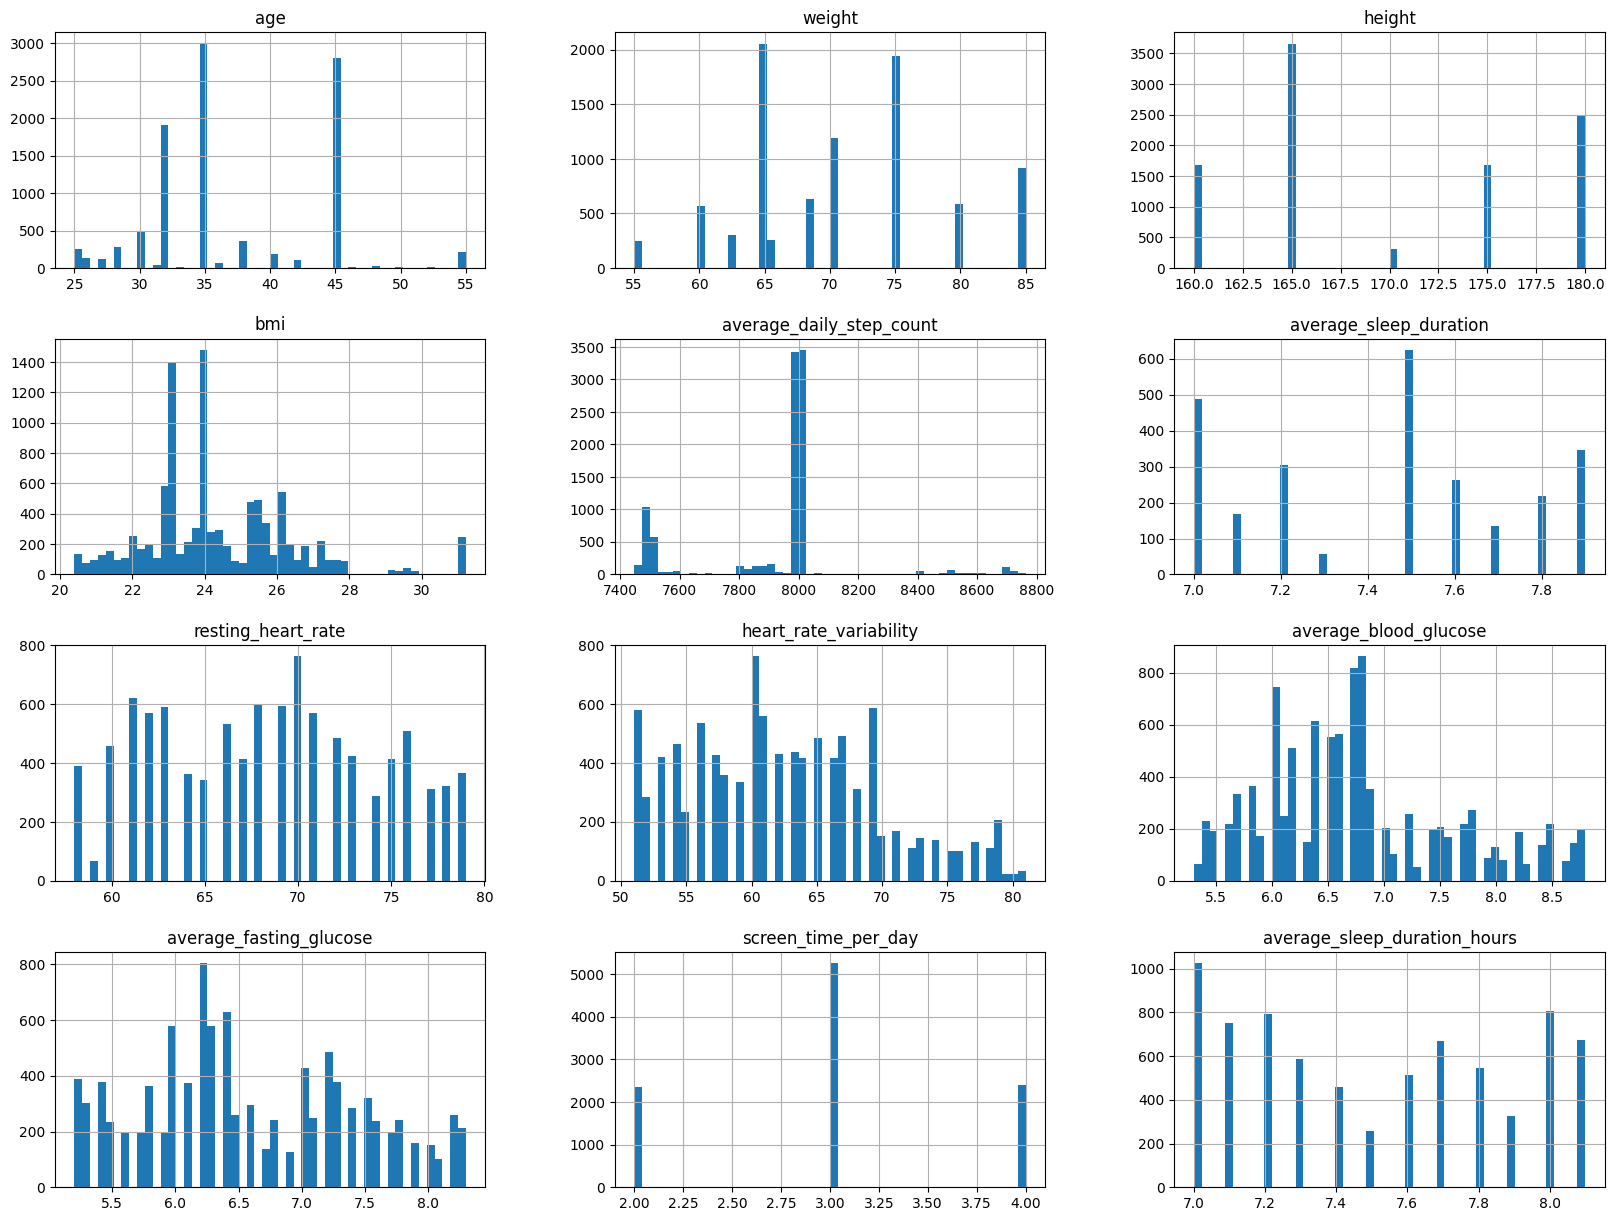

In [8]:
df_res.hist(bins=50, figsize=(20,15))

In [9]:
df = pd.read_csv('data/descriptives.csv')

# Drop columns that are uninformative
cols_to_drop = ['health_related_activities', 'name', 'patient_id', 'current_country_of_residence',\
     'conversation_id', 'average_sleep_duration', 'diastolic', 'systolic', 'state_code', 'drug_usage',\
           'average_blood_pressure'] #, 'diastolic', 'systolic', 'average_blood_pressure']  #smoking_status? drug_usage?
df_res = df.drop(cols_to_drop, axis=1)

# Replace _RARE_ with NaN and convert to float for weight, height
if 0:
     for col in ['weight', 'height']:
          df_res[col].replace('_RARE_', np.nan, inplace=True)
          df_res[col] = df_res[col].astype(float)

# Replace nan with Unknown for categorical variables
unknown_cols = ['number_of_children', 'smoking_status', 'specific_preferences', 'challenges',]
for col in unknown_cols:
    df_res[col].replace(np.nan, 'Unknown', inplace=True)

# Replace 'Type 2 Diabetes' with 'Type 2 diabetes' for father
df_res['father'].replace('Type 2 Diabetes', 'Type 2 diabetes', inplace=True)


print(df_res.shape)
print(df_res.info())
print(df_res.describe())

(300, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        300 non-null    object 
 1   age                           300 non-null    int64  
 2   ethnicity                     300 non-null    object 
 3   country_of_birth              300 non-null    object 
 4   weight                        299 non-null    object 
 5   height                        299 non-null    object 
 6   bmi                           299 non-null    float64
 7   average_daily_step_count      300 non-null    int64  
 8   resting_heart_rate            300 non-null    int64  
 9   heart_rate_variability        300 non-null    float64
 10  average_blood_glucose         300 non-null    float64
 11  average_fasting_glucose       299 non-null    float64
 12  diet_type                     300 non-null    object 


In [7]:
Nrows = df_res.shape[0]
for col in df_res.columns:
    unique = df_res[col].unique();
    # calculate frequency of each value
    print("\n", col)
    for val in unique:
        if val not in ['nan']:
            N = len(df_res[df_res[col] == val])
            print(val, N, N/Nrows)
    print("NAN ", len(df_res[df_res[col].isna()]))



 gender
Female 159 0.53
Male 141 0.47
NAN  0

 age
45 83 0.27666666666666667
32 60 0.2
28 16 0.05333333333333334
35 88 0.29333333333333333
24 1 0.0033333333333333335
40 10 0.03333333333333333
36 3 0.01
30 13 0.043333333333333335
25 4 0.013333333333333334
38 3 0.01
55 7 0.023333333333333334
57 1 0.0033333333333333335
42 4 0.013333333333333334
10 1 0.0033333333333333335
31 2 0.006666666666666667
20 1 0.0033333333333333335
22 1 0.0033333333333333335
65 2 0.006666666666666667
NAN  0

 ethnicity
Bulgarian 1 0.0033333333333333335
French 8 0.02666666666666667
Nigerian 4 0.013333333333333334
Japanese 9 0.03
Bangladeshi 1 0.0033333333333333335
Chinese 13 0.043333333333333335
Scottish 1 0.0033333333333333335
German 3 0.01
Indian 11 0.03666666666666667
Mexican 11 0.03666666666666667
Kenyan 3 0.01
Syrian 1 0.0033333333333333335
Egyptian 9 0.03
Russian 12 0.04
Asian 5 0.016666666666666666
British 4 0.013333333333333334
Norwegian 2 0.006666666666666667
Spanish 3 0.01
Canadian 2 0.006666666666666667